In [36]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../functions')
from model import get_unet
from data import load_data
from keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from metrics import f1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading The Data

In [7]:
x, y = load_data('../data/')

100%|██████████| 5088/5088 [00:03<00:00, 1650.14it/s]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Loading The Model

In [9]:
model = get_unet(input_shape = (128, 128, 3), batchnorm = True)

In [10]:
callbacks = [
    EarlyStopping(monitor='val_acc', patience=3, verbose=0)
]

## Fitting The Model

In [12]:
history = model.fit(x_train, y_train, validation_split = 0.166, epochs = 100, callbacks = callbacks)

Train on 2842 samples, validate on 566 samples
Epoch 1/100
2842/2842 [==============================] - 787s 277ms/step - loss: 1.7431 - acc: 0.8388 - val_loss: 0.3501 - val_acc: 0.9341
Epoch 2/100
2842/2842 [==============================] - 721s 254ms/step - loss: 0.3699 - acc: 0.9265 - val_loss: 0.2110 - val_acc: 0.9358
Epoch 3/100
2842/2842 [==============================] - 505s 178ms/step - loss: 0.2256 - acc: 0.9388 - val_loss: 0.1929 - val_acc: 0.9362
Epoch 4/100
2842/2842 [==============================] - 473s 166ms/step - loss: 0.1690 - acc: 0.9450 - val_loss: 0.1533 - val_acc: 0.9434
Epoch 5/100
2842/2842 [==============================] - 520s 183ms/step - loss: 0.1271 - acc: 0.9524 - val_loss: 0.1251 - val_acc: 0.9497
Epoch 6/100
2842/2842 [==============================] - 548s 193ms/step - loss: 0.1048 - acc: 0.9572 - val_loss: 0.1034 - val_acc: 0.9565
Epoch 7/100
2842/2842 [==============================] - 603s 212ms/step - loss: 0.0907 - acc: 0.9604 - val_loss: 0.086

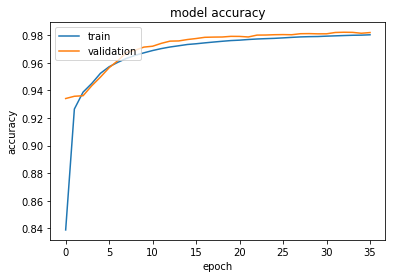

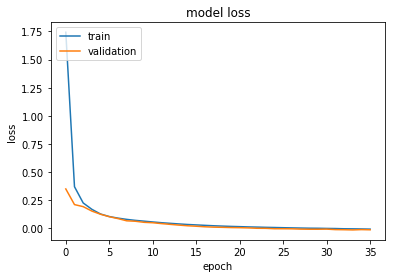

In [41]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Saving The Weights

In [39]:
model.save_weights('../weights/unet_weights.h5')

# Evaluation
## Visualization The Predictions To Make Sure It Makes Sense

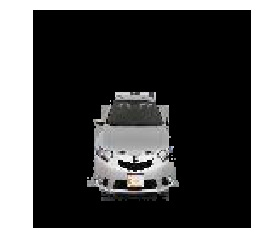

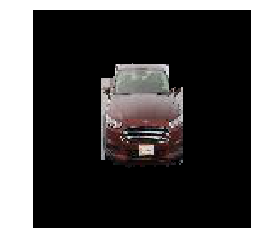

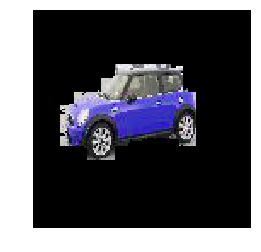

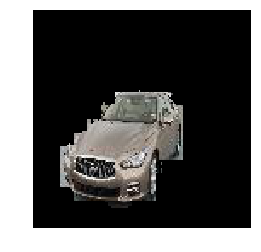

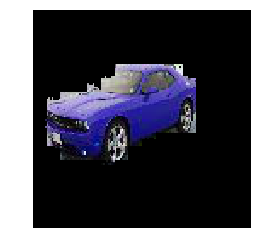

In [13]:
import numpy as np
im_nums = [2, 6, 5, 8, 10]
for im_num in im_nums:
    prediction = np.expand_dims(model.predict(x_train[im_num:im_num + 1])[0, :, :, 0] > .2, axis = 2)
    plt.imshow(np.multiply(x_train[im_num], np.concatenate([prediction for _ in range(3)], axis = 2)))
    plt.axis('off')
    plt.show()

## Evaluations

In [14]:
train_predictions = model.predict(x_train, verbose = 1)
test_predictions = model.predict(x_test, verbose = 1)

1680/1680 [==============================] - 85s 51ms/step


In [38]:
print("Train F1: ", f1(y_train, train_predictions))
print("Test F1: ", f1(y_test, test_predictions))

Train F1:  0.9663927488221897
Test F1:  0.9656814621519707
